In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
df =pd.read_csv('K:/projects/Resume_category_teller/archive/UpdatedResumeDataSet.csv')

In [15]:
df.info()
df.head()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


Category    0
Resume      0
dtype: int64

In [16]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


<Axes: xlabel='Category'>

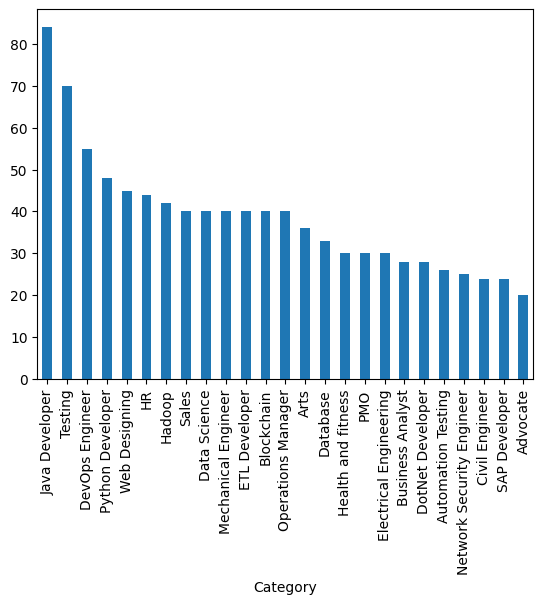

In [17]:
df['Category'].value_counts().plot(kind='bar')
 

In [18]:
import re 
def cleanResume(text):
    # Remove URLs
    cleaned_text = re.sub('http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # remove @mentions
    cleaned_text = re.sub('@\S+', '', cleaned_text, flags=re.MULTILINE)
    # remove the hashtags
    cleaned_text = re.sub('#\S+', '', cleaned_text, flags=re.MULTILINE)
    # remove RT|CC 
    cleaned_text = re.sub('RT|CC\S+', '', cleaned_text, flags=re.MULTILINE)
    # remove special characters
    cleaned_text = re.sub('[%s]' % re.escape("""!@#$%^&*()-_=+{}[]:;'"?/\><.,~`*-.|"""),'', cleaned_text, flags=re.MULTILINE)
    #remove other unwanted things
    cleaned_text = re.sub(r'[^\x00-\x7f]', '', cleaned_text) 
    # remove extra spaces
    cleaned_text = re.sub('\s+', ' ', cleaned_text).strip()
    #finally return the cleaned text
    return cleaned_text

<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\S'
<>:10: SyntaxWarning: invalid escape sequence '\S'
<>:12: SyntaxWarning: invalid escape sequence '\>'
<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\S'
<>:10: SyntaxWarning: invalid escape sequence '\S'
<>:12: SyntaxWarning: invalid escape sequence '\>'
<>:16: SyntaxWarning: invalid escape sequence '\s'
C:\Users\kashy\AppData\Local\Temp\ipykernel_25588\527225446.py:4: SyntaxWarning: invalid escape sequence '\S'
  cleaned_text = re.sub('http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
C:\Users\kashy\AppData\Local\Temp\ipykernel_25588\527225446.py:6: SyntaxWarning: invalid escape sequence '\S'
  cleaned_text = re.sub('@\S+', '', cleaned_text, flags=re.MULTILINE)
C:\Users\kashy\AppData\

In [19]:
df["Resume"] = df["Resume"].apply(lambda x: cleanResume(x))

In [20]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikitlearn matplotlib Sql Java JavaScriptJQuery Machine learning Regression SVM Nave Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3js DCjs Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learningEducation Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in accelerating the revie

In [21]:
#convert the words into categorical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
df['Category'] = le.fit_transform(df['Category'])


In [22]:
df['Category'] = df['Category'].astype('category')

now after this we got the data cleaned fully next step is to victorise the data set of resume using sklearn vectorisation , where we would be coverting the text to tfidf format 


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Resume'])    
         

after this process there is another important process where we would be training the the data to actually learn to categorise the data set 
lets start with the traing and testing split 


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['Category'], test_size=0.2, random_state=42)

after spliting the data we can now train the model using the various classification algorithms
here we would be using K nearest algo to classify the dataset 


In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
knn = OneVsRestClassifier(KNeighborsClassifier())
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred)) 

Accuracy: 0.9844559585492227


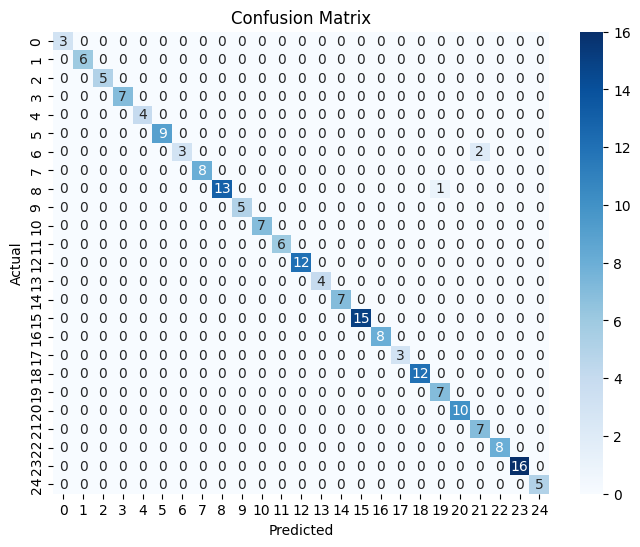

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Option 1: Simple seaborn heatmap
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


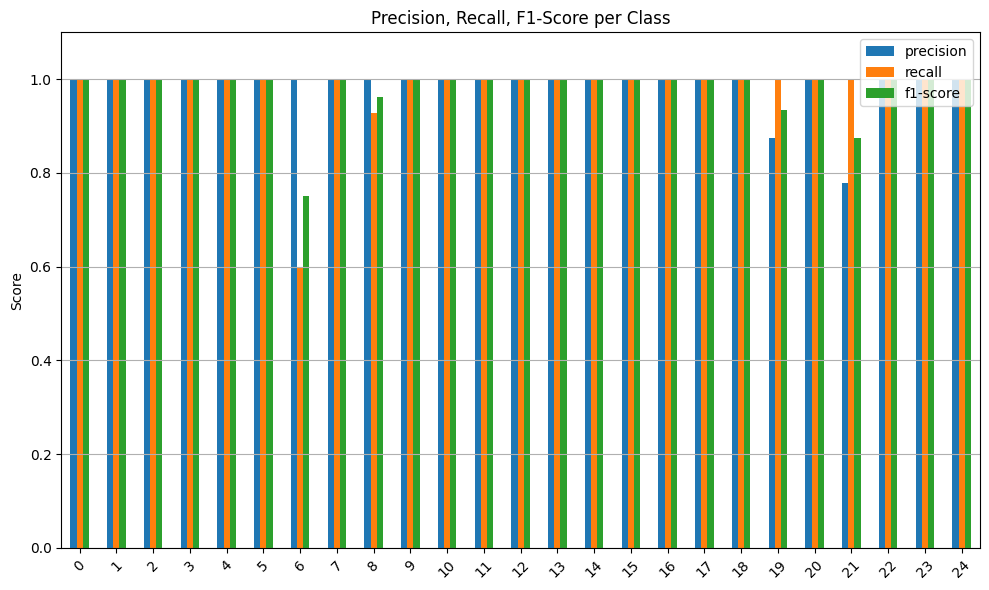

In [27]:
from sklearn.metrics import classification_report
import pandas as pd

# Get the classification report as a dictionary
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Drop accuracy/support rows for plotting if needed
df_metrics = df_report.drop(['accuracy', 'macro avg', 'weighted avg'])

# Plot bar chart
df_metrics[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6))
plt.title('Precision, Recall, F1-Score per Class')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.grid(True, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [28]:
import pickle

pickle.dump(knn, open("model.pkl", "wb"))
pickle.dump(tfidf, open("tfidf.pkl", "wb"))
pickle.dump(le, open("label_encoder.pkl", "wb"))
